In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/hitendraparanjpe/Downloads/DSData-master/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Inference
1.The Data in all the columns in continuous data with data type as float so no requirement of encoding.

2.All the columns contain non null values

3.As the column Unnamed consists of only serial numbers we can drop the column as it is not the feature

4.So, in this problem statement we have 3 Features and 1 target.

In [8]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df.drop(columns =('Unnamed: 0'),axis = 1, inplace = True)

In [13]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
#lets check coorelation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


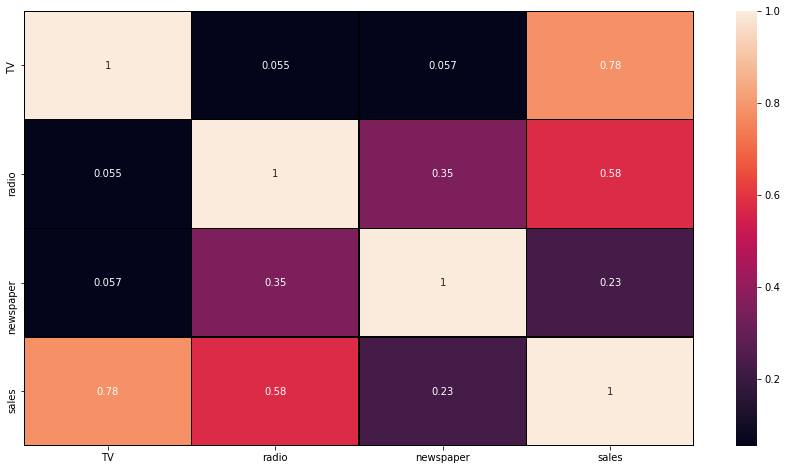

In [18]:
#let plot the Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black')
plt.show()

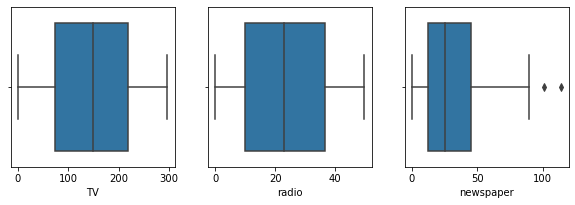

In [21]:
#Checking for outliers.
plt.figure(figsize=(10,10))

plotnumber = 1

for column in df:
    if plotnumber <=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 10)
        
    plotnumber+=1
    
plt.show()

In [22]:
#removing Outliers
iqr = 1.5*(np.percentile(df['newspaper'],75) - np.percentile(df['newspaper'],25))
iqr

48.525000000000006

In [23]:
df.drop(df[df['newspaper'] > (np.percentile(df['newspaper'],75)+iqr)].index, axis = 0,inplace = True)

df.drop(df[df['newspaper'] < (np.percentile(df['newspaper'],25)-iqr)].index, axis = 0, inplace = True)

In [24]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
#checking Skewness
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [26]:
#Treating skewness using index
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.sqrt(df[index])

In [27]:
#again chceking skewness
df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

We have reduced the skewness present, Now lets start the modelling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Regression Model

In [29]:
# Lets Separate Input and Output variables
X=df.drop(columns=["sales"])
Y=df[["sales"]]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 50,test_size=0.30)

In [31]:
SC=StandardScaler()
SC.fit(X)
x=SC.transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [32]:
X=df.drop(columns=["sales"])
Y=df[["sales"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=70, test_size=0.30)
LR = LinearRegression().fit(X_train, Y_train)
LR_preds = LR.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, LR_preds)))
print("R^2: ", r2_score(Y_test, LR_preds))

RMSE:  1.5009500865966223
R^2:  0.9188971959460331


In [33]:
#Lets use cross validation
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(LR,X,Y,cv=6,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(LR,X,Y,cv=6,scoring="r2").std())
print(cross_val_score(LR,X,Y,cv=6,scoring="r2"))

Mean r2 score for Linear Regression:  0.8868941047683484
standard deviation in r2 score for Linear Regression:  0.03068506251110075
[0.87854655 0.9149545  0.90581225 0.82303266 0.89515599 0.90386267]


# Using KNN

In [34]:
#Lets chcek KNN regressor
# finding optimal value of number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [35]:
par={"leaf_size":range(1,3),"n_neighbors":range(1,15)}
knn=KNeighborsRegressor()
grd = GridSearchCV(knn, param_grid = par)
grd.fit(X,Y)
grd.best_params_

{'leaf_size': 1, 'n_neighbors': 3}

In [36]:
knn=KNeighborsRegressor(leaf_size=1, n_neighbors=3)

In [37]:
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(X_train,Y_train)
        Y_pred = regr.predict(X_test)
        r2_scr=r2_score(Y_test,Y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [39]:
r_state=maxr2_score(knn,X,Y)

max r2 score corresponding to  81  is  0.9817964265259829


In [40]:
#Checking cross validation

print("Mean r2 score for KNN Regression: ",cross_val_score(knn,X,Y,cv=6,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knn,X,Y,cv=6,scoring="r2").std())
print(cross_val_score(knn,X,Y,cv=6,scoring="r2"))

Mean r2 score for KNN Regression:  0.9618791360766438
standard deviation in r2 score for KNN Regression:  0.009664882592717272
[0.96263621 0.96738147 0.97758703 0.94842511 0.96335067 0.95189432]


# SVM Model

In [41]:
#Lets try SVM regressor
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=10)
clf.fit(X,Y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [42]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,X,Y)

max r2 score corresponding to  63  is  0.994387853117353


In [43]:
#Checking Cross Validation
print("Mean r2 score for SVM Regression: ",cross_val_score(svr,X,Y,cv=6,scoring="r2").mean())
print("standard deviation in r2 score for SVM Regression: ",cross_val_score(svr,X,Y,cv=6,scoring="r2").std())
print(cross_val_score(svr,X,Y,cv=6,scoring="r2"))

Mean r2 score for SVM Regression:  0.9851186232551208
standard deviation in r2 score for SVM Regression:  0.011066552803676548
[0.99029392 0.99073648 0.99115968 0.96043806 0.98921543 0.98886817]


From all the above model we find that the SVM model is the best performing one, Hence we can go ahead with SVM model with a random state as 63 for maximum accuracy

In [44]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y,random_state = 63,test_size=0.20)
svr=SVR(kernel="rbf",C=10)
svr.fit(X_train,Y_train)
Y_pred=svr.predict(X_test)

In [45]:
print("RMSE is: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("r2_score is: ",r2_score(Y_test,Y_pred))

RMSE is:  0.3721097403806967
r2_score is:  0.994387853117353


In [46]:
import pickle
filename = 'Sales_Advertising.pkl'
pickle.dump(svr, open( filename, "wb" ) )